In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la
from scipy import fft

In [42]:
img = plt.imread('../Pictures/barbara_512.png')

(512, 512)
<class 'numpy.ndarray'>


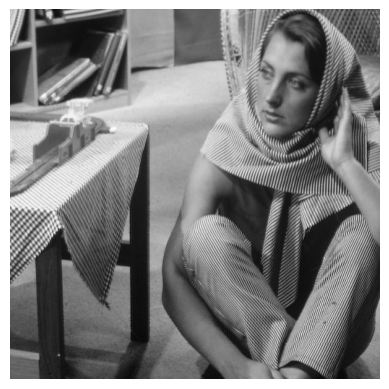

In [43]:
print(img.shape)
print(type(img))

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

decompose image into patches

In [114]:
class Img2patch:
    def __init__(self):
        pass
    

    def __call__(self, *args, **kwargs):
        if kwargs.get('inv'):
            return self.patch2img(*args)
        else:
            return self.img2patch(*args)
    

    def img2patch(self, img, size, repeat_rate):
        img_size = img.shape[0]
        d_ = int(size**0.5)
        h_ = d_ * (1 - repeat_rate)
        division_ = np.arange(0, img_size-d_+h_, h_).astype(int)

        patches_ = []

        for i in range(len(division_)):
            pi_ = division_[i]
            for j in range(len(division_)):
                pj_ = division_[j]
                patch_ = img[pi_:pi_+d_, pj_:pj_+d_]
                patch_ = patch_.reshape(-1, 1)
                patches_.append(patch_)

        patches_ = np.concatenate(patches_, axis=1)
        return patches_
    
    
    def patch2img(self, patches, repeat_rate):
        P, N = patches.shape
        d_ = int(P**0.5)
        n_ = int(N**0.5)
        
        img_size_ = int(d_ * (n_ - (n_ - 1) * repeat_rate))
        img_ = np.zeros((img_size_, img_size_))

        for idx in range(N):
            patch_ = patches[:, idx].reshape(d_, d_)
            i_ = int((idx // n_) * d_ * (1 - repeat_rate))
            j_ = int((idx % n_) * d_ * (1 - repeat_rate))
            
            img_[i_:i_+d_, j_:j_+d_] = img_[i_:i_+d_, j_:j_+d_] + patch_

        for j in range(1, n_):
            p_ = int(j * d_ * (1 - repeat_rate))
            img_[:, p_:p_+int(d_ * repeat_rate)] = img_[:, p_:p_+int(d_ * repeat_rate)] / 2

        for i in range(1, n_):
            p_ = int(i * d_ * (1 - repeat_rate))
            img_[p_:p_+int(d_ * repeat_rate), :] = img_[p_:p_+int(d_ * repeat_rate), :] / 2
    
        plt.imshow(img_, cmap='gray')
        plt.axis('off')
        plt.show()


Img2patch = Img2patch()

(64, 7225)


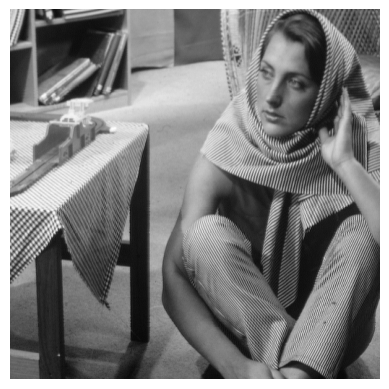

In [122]:
patches = Img2patch(img, 2**6, 0.25)
print(patches.shape)
Img2patch(patches, 0.25, inv=True)